### Import Dataset
- Reads the dataset `trailing_data.csv` into a pandas DataFrame for analysis.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#CONSTS
READ_FOLDER_PATH = '../data/processed/'
WRITE_FOLDER_PATH = '../data/processed/'

aggregated_data = pd.read_csv(READ_FOLDER_PATH+'trailing_data.csv')

print(aggregated_data.shape[0])
pd.set_option("display.max_colwidth", None) 
aggregated_data

3639


,id_odsp,date,season,league,country,home_team,away_team,odd_h,odd_d,odd_a,...,leading_team_momentum_to_attack,trailing_team_attack_intensity,leading_team_attack_intensity,trailing_team_defensive_pressure,leading_team_defensive_pressure,trailing_team_shot_to_corner_ratio_pre_80,leading_team_shot_to_corner_ratio_pre_80,trailing_team_aggression_score_pre_80,leading_team_aggression_score_pre_80,trailing_team_probability
0,Aw5DflLH/,2011-08-06,2012,D1,germany,FC Augsburg,SC Freiburg,2.36,3.60,3.40,...,-0.294,0,0,1,-4,2.250,2.667,1.556,3.125,42.373
1,CzPV312a/,2011-08-06,2012,F1,france,Paris Saint-Germain,Lorient,1.55,4.50,9.40,...,-0.106,3,0,0,0,2.750,1.800,1.727,0.667,64.516
2,GUOdmtII/,2011-08-06,2012,F1,france,Caen,Valenciennes,2.50,3.40,3.45,...,0.000,0,0,0,-2,1.250,4.500,1.000,1.000,28.986
3,Wn69eU5B/,2011-08-06,2012,D1,germany,FC Cologne,VfL Wolfsburg,3.00,3.80,2.54,...,-0.788,2,0,-1,0,1.000,4.667,1.857,1.286,33.333
4,bkjpaC6n/,2011-08-06,2012,D1,germany,Werder Bremen,Kaiserslautern,1.83,4.20,4.80,...,1.092,1,4,-1,0,1.500,2.833,4.167,0.647,20.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,r5V5rw33/,2017-01-22,2017,E0,england,Arsenal,Burnley,1.23,7.65,17.75,...,0.813,0,1,-1,-1,2.500,2.333,1.100,0.381,5.634
3635,r5m8MY4G/,2017-01-22,2017,D1,germany,Bayer Leverkusen,Hertha Berlin,1.82,3.80,5.70,...,0.000,0,0,1,1,2.000,2.000,2.500,0.917,17.544
3636,trUaUcuk/,2017-01-22,2017,SP1,spain,Osasuna,Sevilla,6.80,4.42,1.58,...,0.633,0,1,1,0,4.000,1.833,1.083,0.909,14.706
3637,xSU9scI9/,2017-01-22,2017,E0,england,Chelsea,Hull,1.19,8.50,20.00,...,0.000,1,0,0,-2,1.143,0.875,1.500,1.571,5.000


### Calculate Stats
Calculates:
- Num of 0s and 1s
- Probabilitiy of 0 and 1 
- Expected Value
- Variance
- Odds (Probability of success / Probability of failure)

In [28]:
# Calculate probabilities and statistics
target_counts=aggregated_data['target'].value_counts()
total_games =target_counts.sum() 
total_1s = target_counts.get(1, 0)
total_0s = target_counts.get(0, 0) 

#Calculate probabilities
prob_corner = target_counts.get(1, 0) / total_games  #Probability of getting a corner
prob_no_corner = target_counts.get(0, 0) / total_games  #Probability of not getting a corner

# Expected value
expected_value = 1*prob_corner + 0*prob_no_corner
#Variance
variance = prob_corner *prob_no_corner  
 
# Odds (Probability of success / Probability of failure)
odds = prob_corner / prob_no_corner if prob_no_corner >0 else float('inf') 
# Decimal betting odds (inverse of probability)
betting_odds = 1 /prob_corner if prob_corner >0 else float('inf') 
    
# Display the results
print("--- Stats ---")
print(f"Total Games: {total_games}") 
print(f"Total 1s: {total_1s}") 
print(f"Total 0s: {total_0s}\n") 
print(f"Probability of getting a corner (P(target=1)): {prob_corner:.4f}")
print(f"Probability of not getting a corner (P(target=0)): {prob_no_corner:.4f}")
print(f"Expected Value :{expected_value:.4f}") 
print(f"Variance: {variance:.4f}\n")
print(f"Odds (Corner vs No Corner): {odds:.4f}") 
print(f"Betting Odds (Decimal): {betting_odds:.2f}") 

--- Stats ---
Total Games: 3639
Total 1s: 2068
Total 0s: 1571

Probability of getting a corner (P(target=1)): 0.5683
Probability of not getting a corner (P(target=0)): 0.4317
Expected Value :0.5683
Variance: 0.2453

Odds (Corner vs No Corner): 1.3164
Betting Odds (Decimal): 1.76


### Plot Number of Games where Target was 1 vs 0

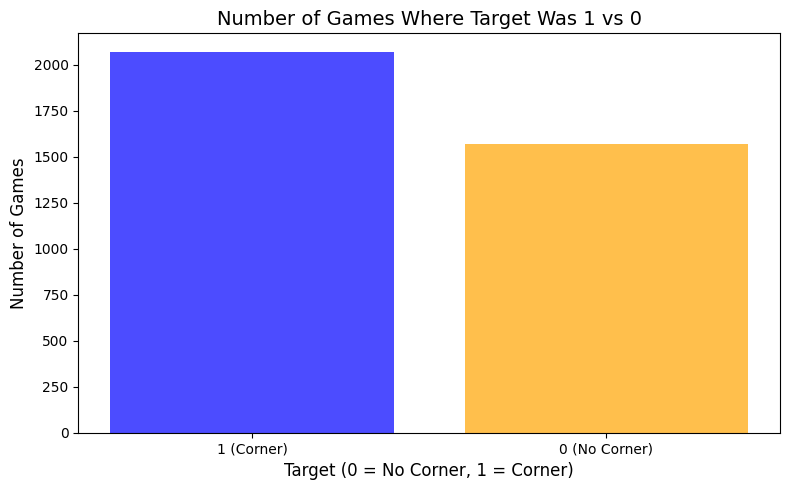

In [29]:
# Plot the number of games where the target was 1 vs 0
target_counts = aggregated_data['target'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index.astype(str), target_counts.values, color=['blue', 'orange'], alpha=0.7)
plt.title('Number of Games Where Target Was 1 vs 0', fontsize=14)
plt.xlabel('Target (0 = No Corner, 1 = Corner)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks([1, 0], labels=['0 (No Corner)', '1 (Corner)'])
plt.tight_layout()
plt.show()

### Plot Target by league

- Plots total games played and ratio of Target being 1 vs 0 split across all 5 leagues

target     0    1
country          
england  213  325
france   395  510
germany  268  331
italy    353  446
spain    342  456


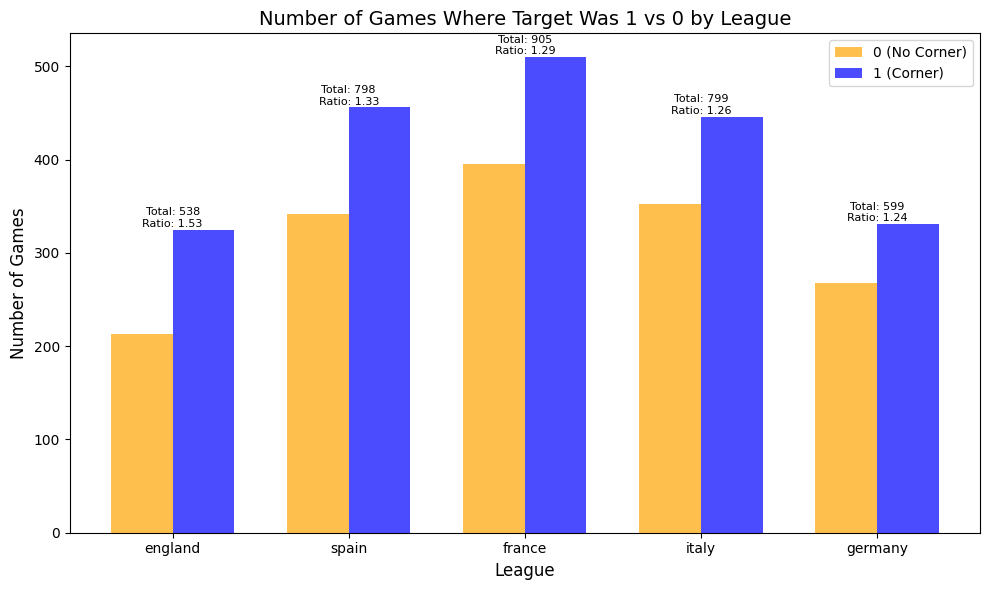

In [30]:
aggregated_data_copy = aggregated_data.copy()
plot_data = aggregated_data_copy.groupby(['country', 'target']).size().unstack(fill_value=0)
print(plot_data)

#Calculate total games and ratio
plot_data['total'] = plot_data[0] + plot_data[1]
plot_data['ratio'] = plot_data[1] /plot_data[0].replace(0,1)

#most 'succesful' league plotted first
plot_data = plot_data.sort_values(by='ratio', ascending=False)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6)) 
bar_width = 0.35 
index = range(len(plot_data)) 
   
bars_0 = ax.bar([i- bar_width/2 for i in index], plot_data[0],bar_width,label='0 (No Corner)', color='orange', alpha=0.7)
bars_1 = ax.bar([i+ bar_width/2 for i in index], plot_data[1],bar_width,label='1 (Corner)', color='blue', alpha=0.7) 

#annotate total game and ratio:
for i, league in enumerate(plot_data.index):
    total_games= plot_data.loc[league, 'total']
    ratio =plot_data.loc[league, 'ratio'] 
    max_height = max(plot_data.loc[league, 0], plot_data.loc[league, 1]) 
    ax.text(i, max_height + 1, f'Total: {total_games}\nRatio: {ratio:.2f}', 
            ha='center',va='bottom',fontsize=8) 

ax.set_title('Number of Games Where Target Was 1 vs 0 by League', fontsize=14)
ax.set_xlabel('League', fontsize=12)
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(plot_data.index)
ax.legend() 
plt.tight_layout()
plt.show() 

### Num of games by target (1 or 0), split by trailing team corners achieved

- Plots the number of corners the trailing team was awarded. Evidently, acheving 1 corner is most common.

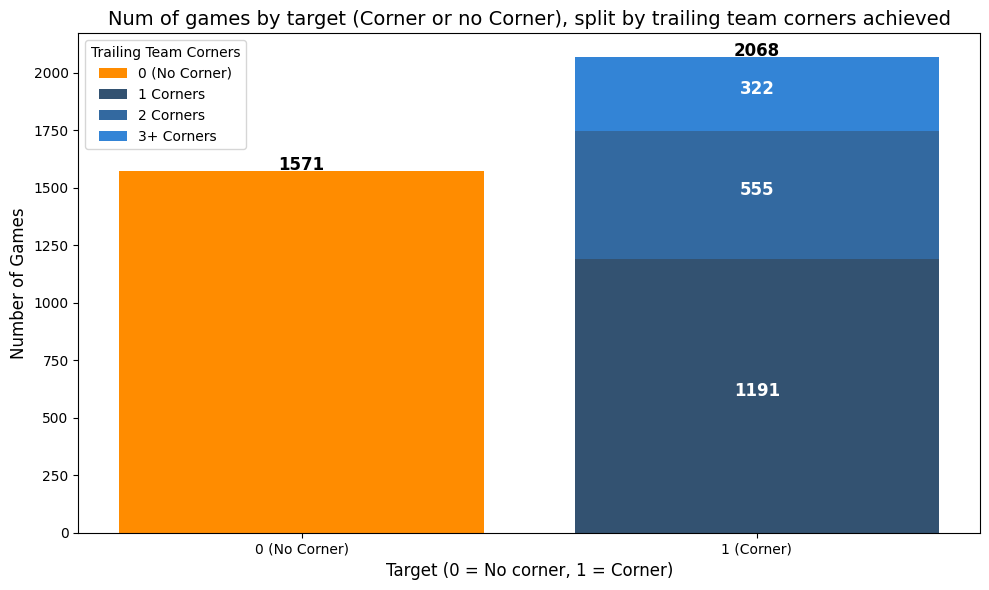

In [42]:
aggregated_data_copy = aggregated_data.copy()

#blue shaded colours
colors = ['#FF8C00', '#00274D', '#004488', '#0066CC']

#bin the trailing team corners so 3 or more is grouped as '3+'
aggregated_data_copy['trailing_team_corners_binned']=aggregated_data_copy['trailing_team_corners'].apply(lambda x:str(x) if x<3 else '3+')

#Group data by target first, then trailing_team_corners binned, then count:
corner_counts = aggregated_data_copy.groupby(['target', 'trailing_team_corners_binned']).size().reset_index(name='count')

# Separate counts for target = 1 (Corner) and target = 0 (No Corner)
corner_counts_1=corner_counts[corner_counts['target']==1].pivot(index='trailing_team_corners_binned',columns='target',values='count').fillna(0)
corner_counts_1 = corner_counts_1.reindex(['1', '2', '3+']).fillna(0) #reorder bins
corner_counts_0 =aggregated_data_copy['target'].value_counts().get(0, 0)

#Plot
plt.figure(figsize=(10, 6))

#First bar...
plt.bar("0 (No Corner)", corner_counts_0, color=colors[0], label="0 (No Corner)")
#Second bar (spliy by corner counts)...
bottom_values = 0
for i, (corners, values) in enumerate(corner_counts_1.iterrows()):
    plt.bar("1 (Corner)", values[1], bottom=bottom_values, label=f"{corners} Corners",alpha=0.8, color=colors[i+1])
    #add centred text...
    plt.text("1 (Corner)", bottom_values + values[1]/2, str(int(values[1])),ha='center',fontsize=12, fontweight='bold',  color='white')
    bottom_values += values[1]

# Add freq values above each bar
plt.text("0 (No Corner)", corner_counts_0+5, str(corner_counts_0),ha='center',fontsize=12,fontweight='bold')
plt.text("1 (Corner)", bottom_values+5, str(int(bottom_values)),ha='center',fontsize=12,fontweight='bold')

plt.title('Num of games by target (Corner or no Corner), split by trailing team corners achieved', fontsize=14)
plt.xlabel('Target (0 = No corner, 1 = Corner)',fontsize=12)
plt.ylabel('Number of Games',fontsize=12)
plt.legend(title='Trailing Team Corners')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Exploring correlation between trailing team probability and target

According to our intuition, and background reserach, a stronger team who are losing are more likely to try and push for a goal. 3 plots are created:
1. KDE (of trailing team probability vs target)
2. Box Plot (of trailing team probability vs target)
3. Bar Chart (of binned win probabilities vs. avg target success rate for that bin (i.e. prob of target being 1))

The results clearly confirm that there is a strong correlation between the strength of a team and our target (whether they get 1+ corners after 80 mins).

/var/folders/hy/8_c5d96s74729952xdwzp2sm0000gn/T/ipykernel_4443/105289975.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_success_rates = data.groupby('probability_bin')['target'].mean()*100  #get target success rate for each bin
/var/folders/hy/8_c5d96s74729952xdwzp2sm0000gn/T/ipykernel_4443/105289975.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['target'].astype(str), y=data['trailing_team_probability'],palette={'0': '#BB5566', '1': '#004488'}, ax=axes[1])


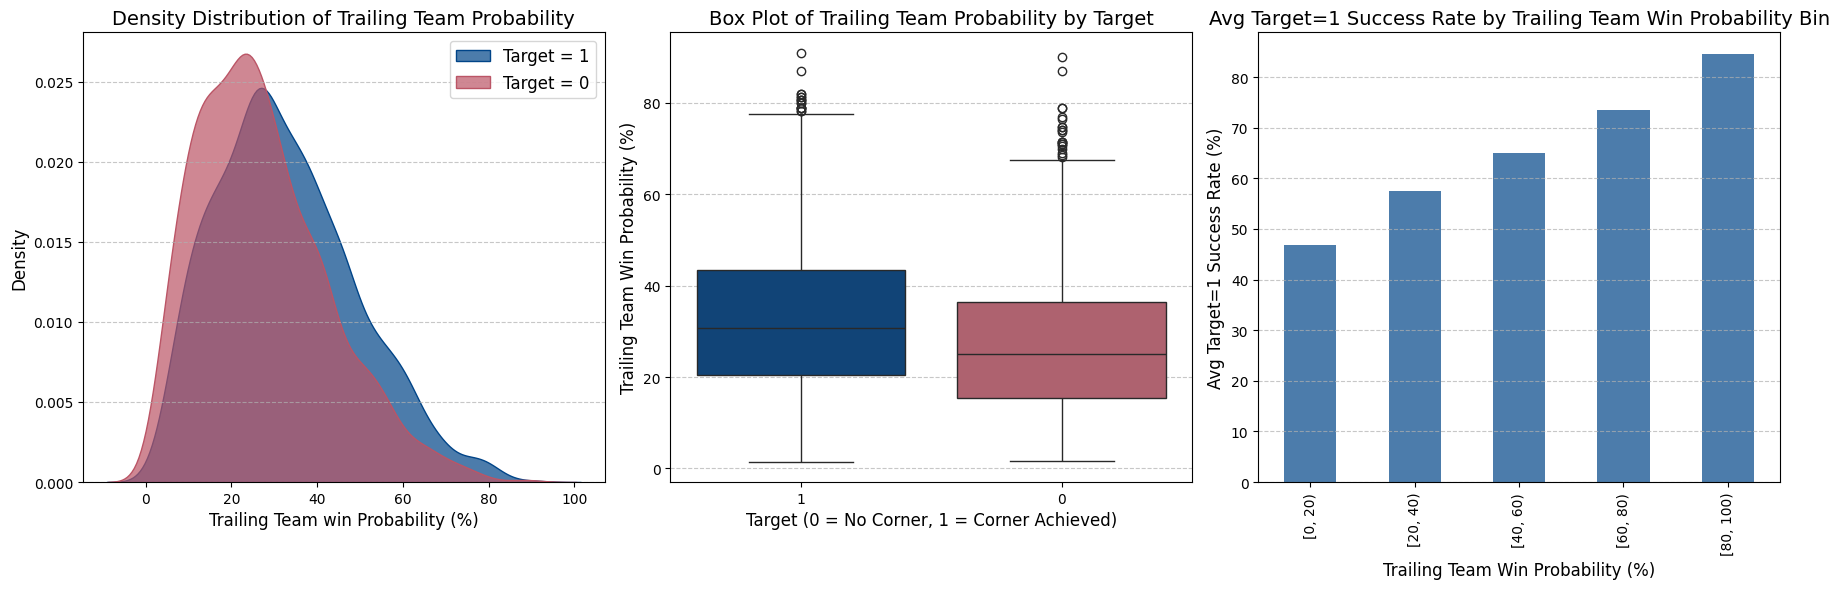

In [46]:
#Convert the trailing teams odds to implied probability:
data = aggregated_data.copy()
data['trailing_team_probability'] = data.apply(lambda row: (1/row['odd_h'])*100 if row['trailing_team']=='home' else (1/row['odd_a'])*100, axis=1)

#Divide probability up into bins
bins = np.arange(0, 110, 20)
data['probability_bin'] = pd.cut(data['trailing_team_probability'], bins, right=False)

bin_success_rates = data.groupby('probability_bin')['target'].mean()*100  #get target success rate for each bin

#Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#Plot 1: KDE (of trailing team probability vs target )
sns.kdeplot(data[data['target']==1]['trailing_team_probability'], fill=True,color='#004488',alpha=0.7, label='Target = 1',ax=axes[0])
sns.kdeplot(data[data['target']==0]['trailing_team_probability'], fill=True,color='#BB5566',alpha=0.7, label='Target = 0',ax=axes[0])
axes[0].set_title('Density Distribution of Trailing Team Probability', fontsize=14)
axes[0].set_xlabel('Trailing Team win Probability (%)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend(fontsize=12)
axes[0].grid(axis='y', linestyle='--',alpha=0.7)

#Plot 2: Box Plot (of trailing team probability vs target )
sns.boxplot(x=data['target'].astype(str), y=data['trailing_team_probability'],palette={'0': '#BB5566', '1': '#004488'}, ax=axes[1])
axes[1].set_title('Box Plot of Trailing Team Probability by Target', fontsize=14)
axes[1].set_xlabel('Target (0 = No Corner, 1 = Corner Achieved)', fontsize=12)
axes[1].set_ylabel('Trailing Team Win Probability (%)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

#Plot 3: Bar Chart (of binned win probabilities vs. avg corner success rate)
bin_success_rates.plot(kind='bar', color='#004488', alpha=0.7, ax=axes[2])
axes[2].set_title('Avg Target=1 Success Rate by Trailing Team Win Probability Bin', fontsize=14)
axes[2].set_xlabel('Trailing Team Win Probability (%)', fontsize=12)
axes[2].set_ylabel('Avg Target=1 Success Rate (%)', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()